<a href="https://colab.research.google.com/github/RADIUMz-Codes/Live-Object-Detection/blob/main/LiveObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
# drive.mount("/content/drive")

In [4]:
prototxt_path = "/content/drive/MyDrive/models/MobileNetSSD_deploy.prototxt"
model_path = "/content/drive/MyDrive/models/MobileNetSSD_deploy.caffemodel"
image_path = "/content/drive/MyDrive/ML images/what-are-humans-animals-mammals-neither.webp"
min_confidance = 20
# anupams contribution

In [5]:
CLASSES = ["aeroplane", "background", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]

In [6]:
# Assigning random colors to each of the classes
np.random.seed(543210)
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [7]:
#loading data into the nural network
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

image = cv2.imread(image_path)
height, width = image.shape[0], image.shape[1]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)),0.005, (300, 300), 130)

In [8]:
#To get prediction
net.setInput(blob)
detected_objects = net.forward()

In [9]:
# Vizualization
for i in range(detected_objects.shape[2]):

  confidance = detected_objects[0][0][i][2]*100
  if confidance > min_confidance:
    class_index = int(detected_objects[0, 0, i, 1])
    upper_left_x = int(detected_objects[0, 0, i, 3] * width)
    upper_left_y = int(detected_objects[0, 0, i, 4] * height)
    lower_right_x = int(detected_objects[0, 0, i, 5] * width)
    lower_right_y = int(detected_objects[0, 0, i, 6] * height)

    prediction_text = f"{CLASSES[class_index]}: {confidance:.2f}%"
    cv2.rectangle(image, (upper_left_x, upper_left_y),(lower_right_x,lower_right_y), COLORS[class_index], 2)
    cv2.putText(image, prediction_text, (upper_left_x + 10,
                upper_left_y - 15 if upper_left_y >30 else upper_left_y + 15),
                cv2.FONT_HERSHEY_PLAIN, 1.0, COLORS[class_index], 2)

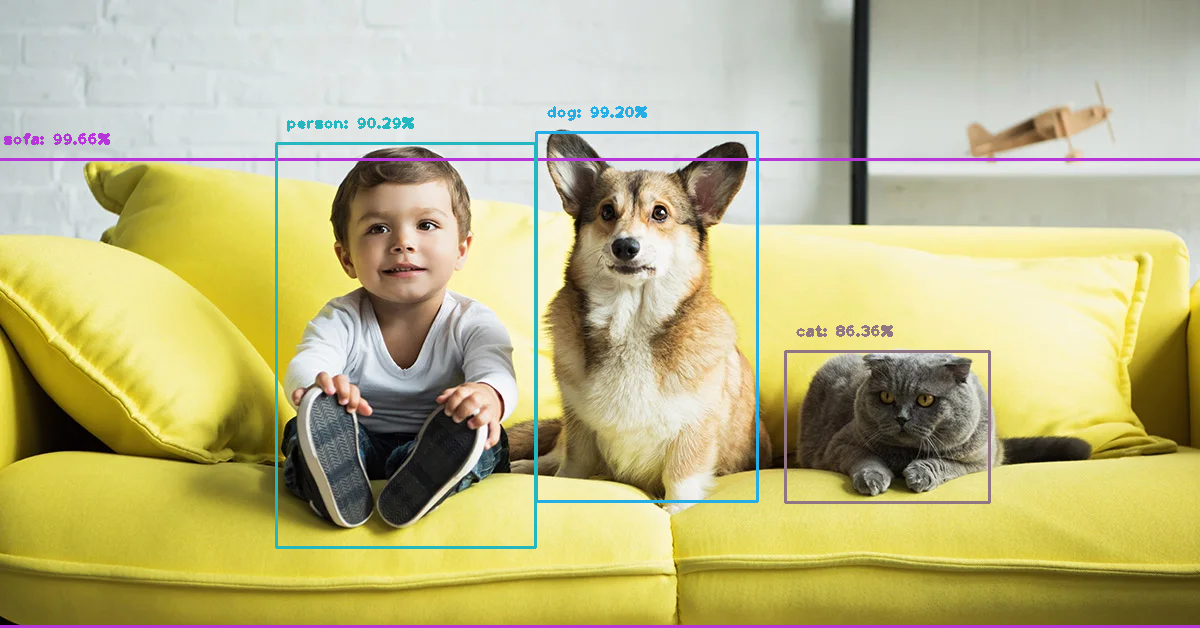

In [10]:
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()